## Movie Recommendations Using Clustering
goal: understand how clustering techniques can be applied in real-world
scenario,  uinge K-Means Clustering to segment movies based on viewer ratings and
preferences.

**Scenario: Movie Streaming Platform** 
A movie streaming platform wants to recommend movies to users based on their preferences. Instead of manually classifying movies, the platform decides to group them using clustering 
techniqu
s.
Your task is to apply K-Means Clustering to analyze a dataset containing movie ratinga   d
segment movies into groups based on their popularity and audience rating

# Task 1: Data Preprocessing
- load dataset
- handle missing values
- select relevant features for clustering (imdb rating, total reviews, box office revenue)

The dataset contains the following attributes:
• Movie ID – Unique identifier for each movie
• Genre – Category of the movie (e.g., Action, Comedy, Drama)
• IMDb Rating (1-10) – Average viewer rating
• Total Reviews – Number of user reviews
• Box Office Revenue (Million $) – Revenue generated by the movie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
movie_data = pd.read_csv("movie_dataset.csv") 

movie_data=movie_data[['id','title', 'genres', 'vote_average','vote_count', 'revenue']]
movie_data.head(5)

print(movie_data.shape)

(4803, 6)


In [12]:
#we check for mssing values
print(movie_data.isnull().sum())

id               0
title            0
genres          28
vote_average     0
vote_count       0
revenue          0
dtype: int64


In [14]:
# since its only 28 rows out of over 4000, we drop them (not a significant amount)
movie_data= movie_data.dropna(subset=['genres'])

movie_data.isnull().any() #double check there are no more nulls

id              False
title           False
genres          False
vote_average    False
vote_count      False
revenue         False
dtype: bool

In [17]:
# picking relevant features for clustering
features = movie_data[['vote_average', 'vote_count', 'revenue']]

# standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Task 2: Apply K-Means Clustering
- choose appropriate K value using elbow method
- Implement K means clustering and segmne movies into distinct groups

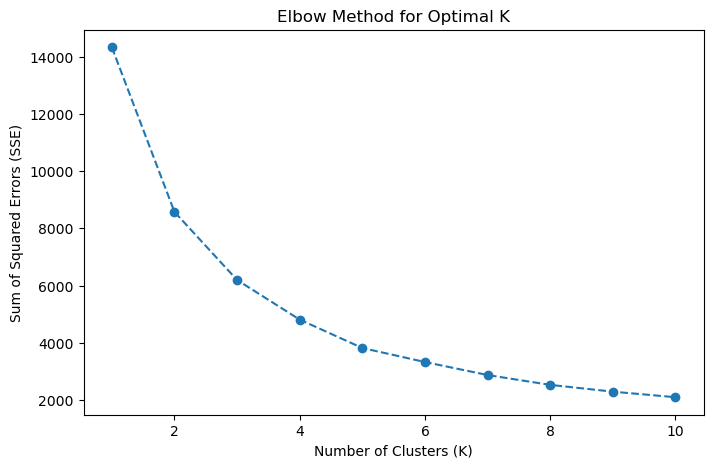

In [18]:
sse = []
k_range = range(1, 11)
for k in k_range:
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

# plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [21]:
# Choosing K=4 based on the elbow method and applying K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
movie_data["Cluster"] = kmeans.fit_predict(scaled_features)

movie_data.head()

,id,title,genres,vote_average,vote_count,revenue,Cluster
0,19995,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800,2787965087,3
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,6.9,4500,961000000,3
2,206647,Spectre,Action Adventure Crime,6.3,4466,880674609,3
3,49026,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106,1084939099,3
4,49529,John Carter,Action Adventure Science Fiction,6.1,2124,284139100,1


# Task 3: Visualization and Interpretation
- use scatter plots to visualize movie clusterrs based on rervenue and ratings
- explain the characteristics of each cluster (high rated blockbuster movies, low rated niche films)
- suggest how the streaming platform can use these clusters to improve recommendations

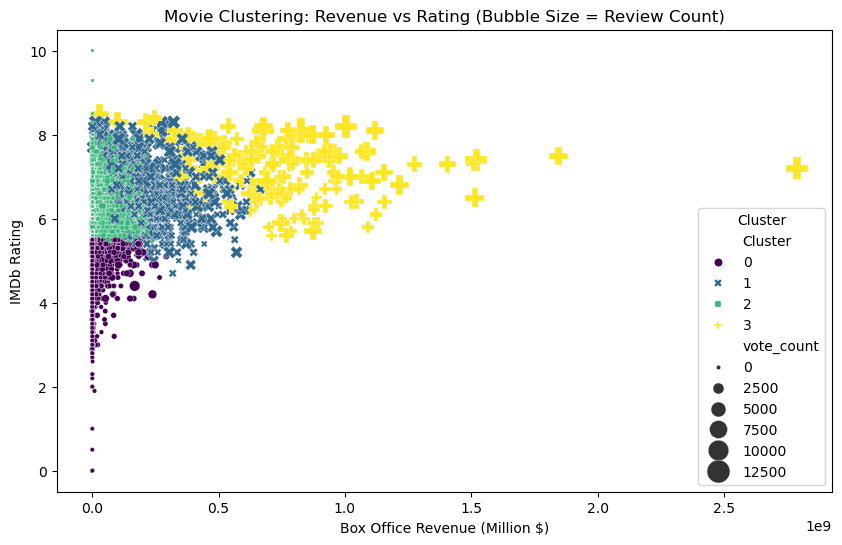

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=movie_data["revenue"],
    y=movie_data["vote_average"],
    hue=movie_data["Cluster"],
    size=movie_data["vote_count"], 
    sizes=(10, 300),  
    palette="viridis",
    style=movie_data["Cluster"],
    markers=True
)

plt.xlabel("Box Office Revenue (Million $)")
plt.ylabel("IMDb Rating")
plt.title("Movie Clustering: Revenue vs Rating (Bubble Size = Review Count)")
plt.legend(title="Cluster")
plt.show()

After clustering, we analyze the clusters and describe them:
1. Cluster 3: High-rated blockbuster movies (high IMDb ratings and high revenue, and many reviews)
2. Cluster 2: Cult classics or niche films (moderate revenue with high review counts).
3. Cluster 1: Average-rated movies with moderate revenue.
4. Cluster 0: Low-rated movies with lower revenue.
The streaming platform can use these clusters to recommend movies based on audience preferences and optimize content suggestions.